## Linear Regression

_Linear regression is a statistical method that allows us to study relationships between two continuous variables. The goal of linear regression is to find the best fit line that minimizes the sum of squared differences between the predicted and actual values._

### Simple Linear Regression

_In a simple linear regression, there is one independent variable and one dependent variable. The model estimates the slope and intercept of the line of best fit, which represents the relationship between the variables. The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero._

_To calculate best-fit line linear regression uses a traditional slope-intercept form which is given below,<br>Yi = β0 + β1Xi<br>where Yi = Dependent variable,  β0 = constant/Intercept, β1 = Slope/Intercept, Xi = Independent variable.<br>This algorithm explains the linear relationship between the dependent(output) variable y and the independent(predictor) variable X using a straight line  Y= B0 + B1 X_

_In regression, the difference between the observed value of the dependent variable(yi) and the predicted value(predicted) is called the residuals.<br>εi =  ypredicted –   yi <br> where ypredicted =   B0 + B1 Xi_

Slope: 2.7993236574802762, Intercept: 4.142913319458566


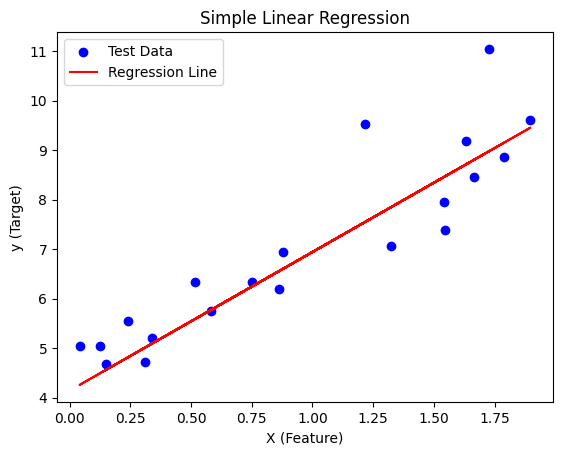

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature (input)
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (output) with some noise

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Getting the model parameters
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Slope: {slope}, Intercept: {intercept}")

# Making predictions on the test set
y_pred = model.predict(X_test)

# Plotting the regression line along with the test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

### Cost Function for Linear Regression

_The cost function helps to work out the optimal values for B0 and B1, which provides the best fit line for the data points.<br>In Linear Regression, generally Mean Squared Error (MSE) cost function is used, which is the average of squared error that occurred between the ypredicted and yi_

_J(w,b) = 1/2m Σ (y^(i) - y(i))_

### Gradient Descent for Linear Regression

_Gradient Descent is one of the optimization algorithms that optimize the cost function(objective function) to reach the optimal minimal solution. To find the optimum solution we need to reduce the cost function(MSE) for all data points. This is done by updating the values of B0 and B1 iteratively until we get an optimal solution._

### Assumptions of Linear Regression
Regression is a parametric approach, which means that it makes assumptions about the data for the purpose of analysis. For successful regression analysis, it’s essential to validate the following assumptions.

1. Linearity of residuals:<br>There needs to be a linear relationship between the dependent variable and independent variable(s).
2. Independence of residuals: <br>The error terms should not be dependent on one another (like in time-series data wherein the next value is dependent on the previous one). There should be no correlation between the residual terms. The absence of this phenomenon is known as Autocorrelation.There should not be any visible patterns in the error terms.
3. __Normality__ (Normal distribution of residuals) :<br> The mean of residuals should follow a normal distribution with a mean equal to zero or close to zero. This is done in order to check whether the selected line is actually the line of best fit or not.If the error terms are non-normally distributed, suggests that there are a few unusual data points that must be studied closely to make a better model.
4. __Homoscedasticity__ (The equal variance of residuals): <br>The error terms must have constant variance. This phenomenon is known as Homoscedasticity.The presence of non-constant variance in the error terms is referred to as Heteroscedasticity. Generally, non-constant variance arises in the presence of outliers or extreme leverage values.The equal variance of residuals

### Multiple Linear Regression

_Multiple linear regression is a technique to understand the relationship between a single dependent variable and multiple independent variables.<br>The formulation for multiple linear regression is also similar to simple linear regression with the small change that instead of having one beta variable, you will now have betas for all the variables used.The formula is given as:<br>Y = B0 + B1X1 + B2X2 + … + BpXp + ε_

#### Assumptions of Multiple Linear Regression
_All the four assumptions made for Simple Linear Regression still hold true for Multiple Linear Regression along with a few new additional assumptions.<br>1. Overfitting:<br>When more and more variables are added to a model, the model may become far too complex and usually ends up memorizing all the data points in the training set. This phenomenon is known as the overfitting of a model. This usually leads to high training accuracy and very low test accuracy.<br>2. Multicollinearity:<br> It is the phenomenon where a model with several independent variables, may have some variables interrelated.<br>3. Feature Selection:<br> With more variables present, selecting the optimal set of predictors from the pool of given features (many of which might be redundant) becomes an important task for building a relevant and better model._

Intercept: 3.7350145551577345, Coefficients: [3.13900206 4.9211189  2.28520288]
Mean Squared Error: 0.9203988206421475
R-squared: 0.9390442181806122


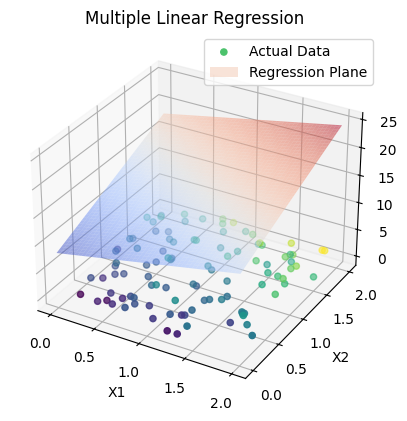

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
# Generating synthetic data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 3)  # Three independent variables
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)  # Target variable

# Creating a Multiple Linear Regression model
model = LinearRegression()

# Fitting the model to the data
model.fit(X, y)

# Getting the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}, Coefficients: {coefficients}")

# Predicting using the trained model
y_pred = model.predict(X)

# Evaluating the model (Optional)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization (Optional, if 3 features or less)
if X.shape[1] <= 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='Actual Data')
    
    # Creating a meshgrid for the hyperplane visualization
    x_surf, y_surf = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))
    z_surf = intercept + coefficients[0] * x_surf + coefficients[1] * y_surf + coefficients[2] * (2 * np.ones_like(x_surf))
    ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, cmap='coolwarm', label='Regression Plane')
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Multiple Linear Regression')
    plt.legend()
    plt.show()

### Multicollinearity
As multicollinearity makes it difficult to find out which variable is actually contributing towards the prediction of the response variable, it leads one to conclude incorrectly, the effects of a variable on the target variable.  Though it does not affect the precision of the predictions, it is essential to properly detect and deal with the multicollinearity present in the model, as random removal of any of these correlated variables from the model causes the coefficient values to swing wildly and even change signs.

Multicollinearity can be detected using the following methods.

1. Pairwise Correlations:<br> Checking the pairwise correlations between different pairs of independent variables can throw useful insights in detecting multicollinearity.


Sample of the Dataset:
         X1        X2        X3        X4
0  0.374540  0.031429  0.642032  0.051682
1  0.950714  0.636410  0.084140  0.531355
2  0.731994  0.314356  0.161629  0.540635
3  0.598658  0.508571  0.898554  0.637430
4  0.156019  0.907566  0.606429  0.726091

Correlation Matrix:
          X1        X2        X3        X4
X1  1.000000 -0.034033 -0.037654 -0.211882
X2 -0.034033  1.000000 -0.146354 -0.011783
X3 -0.037654 -0.146354  1.000000 -0.214816
X4 -0.211882 -0.011783 -0.214816  1.000000


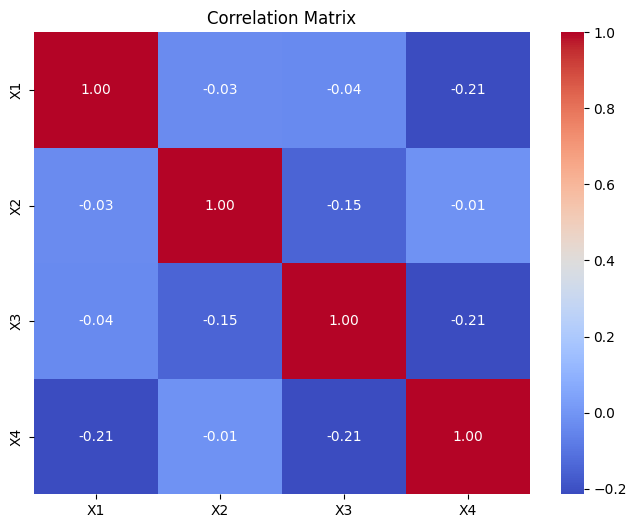

In [8]:
import seaborn as sns
import pandas as pd
# Generating synthetic data for demonstration (replace this with your dataset)
np.random.seed(42)
data = {
    'X1': np.random.rand(100),
    'X2': np.random.rand(100),
    'X3': np.random.rand(100),
    'X4': np.random.rand(100)
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Sample of the Dataset:")
print(df.head())

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

2. Variance Inflation Factor (VIF):<br> Pairwise correlations may not always be useful as it is possible that just one variable might not be able to completely explain some other variable but some of the variables combined could be ready to do this. Thus, to check these sorts of relations between variables, one can use VIF. VIF basically explains the relationship of one independent variable with all the other independent variables. VIF is given by,
<br>VIF = 1/1-R^2<br> where i refers to the ith variable which is being represented as a linear combination of the rest of the independent variables.

The common heuristic followed for the VIF values is if VIF > 10 then the value is definitely high and it should be dropped. And if the VIF=5 then it may be valid but should be inspected first. If VIF < 5, then it is considered a good vif value.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generating synthetic data for demonstration (replace this with your dataset)
np.random.seed(42)
data = {
    'X1': np.random.rand(100),
    'X2': np.random.rand(100),
    'X3': np.random.rand(100),
    'X4': np.random.rand(100)
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Sample of the Dataset:")
print(df.head())

# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# Display VIF values
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

Sample of the Dataset:
         X1        X2        X3        X4
0  0.374540  0.031429  0.642032  0.051682
1  0.950714  0.636410  0.084140  0.531355
2  0.731994  0.314356  0.161629  0.540635
3  0.598658  0.508571  0.898554  0.637430
4  0.156019  0.907566  0.606429  0.726091

Variance Inflation Factors (VIF):
  Feature       VIF
0      X1  2.646598
1      X2  2.951685
2      X3  2.715976
3      X4  2.585478


## Overfitting and Underfitting in Linear Regression
There have always been situations where a model performs well on training data but not on the test data. While training models on a dataset, overfitting, and underfitting are the most common problems faced by people. 

Before understanding overfitting and underfitting one must know about bias and variance.

__Bias__:

Bias is a measure to determine how accurate is the model likely to be on future unseen data. Complex models,  assuming there is enough training data available, can do predictions accurately. Whereas the models that are too naive, are very likely to perform badly with respect to predictions. Simply, Bias is errors made by training data. 

Generally, linear algorithms have a high bias which makes them fast to learn and easier to understand but in general, are less flexible. Implying lower predictive performance on complex problems that fail to meet the expected outcomes.

__Variance__:

Variance is the sensitivity of the model towards training data, that is it quantifies how much the model will react when input data is changed.

Ideally, the model shouldn’t change too much from one training dataset to the next training data, which will mean that the algorithm is good at picking out the hidden underlying patterns between the inputs and the output variables.

Ideally, a model should have lower variance which means that the model doesn’t change drastically after changing the training data(it is generalizable). Having higher variance will make a model change drastically even on a small change in the training dataset.

## Bias Variance Tradeoff
In the pursuit of optimal performance, a supervised machine learning algorithm seeks to strike a balance between low bias and low variance for increased robustness.

In the realm of machine learning, there exists an inherent relationship between bias and variance, characterized by an inverse correlation.

Increased bias leads to reduced variance.
Conversely, heightened variance results in diminished bias.
Finding an equilibrium between bias and variance is crucial, and algorithms must navigate this trade-off for optimal outcomes.

### Overfitting
When a model learns each and every pattern and noise in the data to such extent that it affects the performance of the model on the unseen future dataset, it is referred to as overfitting. The model fits the data so well that it interprets noise as patterns in the data.

When a model has low bias and higher variance it ends up memorizing the data and causing overfitting. Overfitting causes the model to become specific rather than generic. This usually leads to high training accuracy and very low test accuracy.

Detecting overfitting is useful, but it doesn’t solve the actual problem. There are several ways to prevent overfitting, which are stated below:
- Cross-validation
- If the training data is too small to train add more relevant and clean data.
- If the training data is too large, do some feature selection and remove unnecessary features.
- Regularization


### Underfitting:
Underfitting is not often discussed as often as overfitting is discussed. When the model fails to learn from the training dataset and is also not able to generalize the test dataset, is referred to as underfitting. This type of problem can be very easily detected by the performance metrics.

When a model has high bias and low variance it ends up not generalizing the data and causing underfitting. It is unable to find the hidden underlying patterns from the data. This usually leads to low training accuracy and very low test accuracy. The ways to prevent underfitting are stated below,
- Increase the model complexity
- Increase the number of features in the training data
- Remove noise from the data.

Degree 1 Polynomial MSE: 0.555
Degree 4 Polynomial MSE: 0.547
Degree 15 Polynomial MSE: 0.884


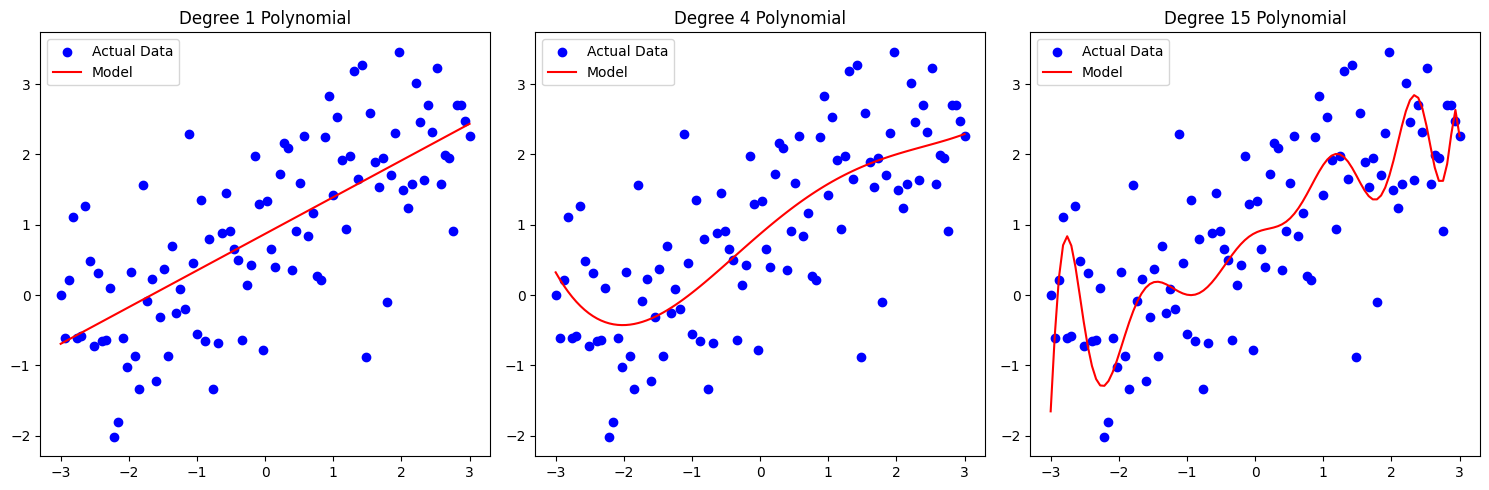

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 0.5 * X + np.random.randn(100, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit models of different complexities (degrees of polynomial features)
degrees = [1, 4, 15]  # Linear, Polynomial (underfit), Polynomial (overfit)
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    # Transforming features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Fitting a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_poly_test)
    
    # Plotting
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, model.predict(poly.transform(X)), color='red', label='Model')
    plt.title(f'Degree {degree} Polynomial')
    plt.legend()
    
    # Calculate and print MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Degree {degree} Polynomial MSE: {mse:.3f}")

plt.tight_layout()
plt.show()